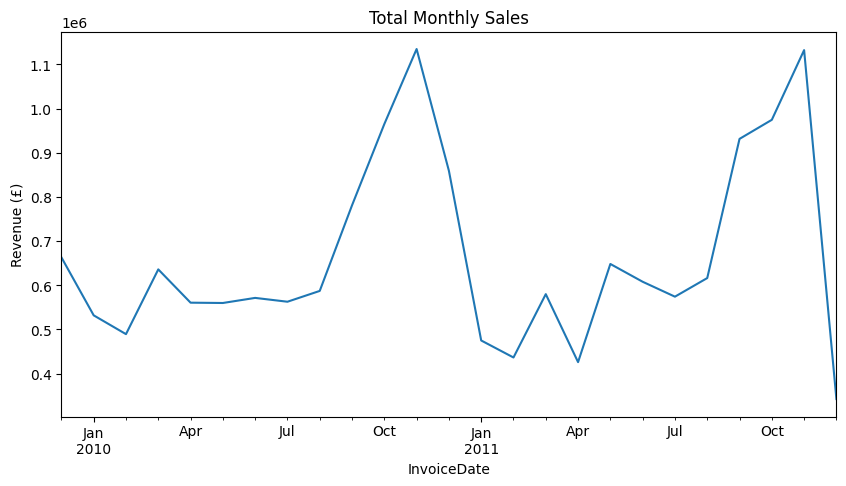

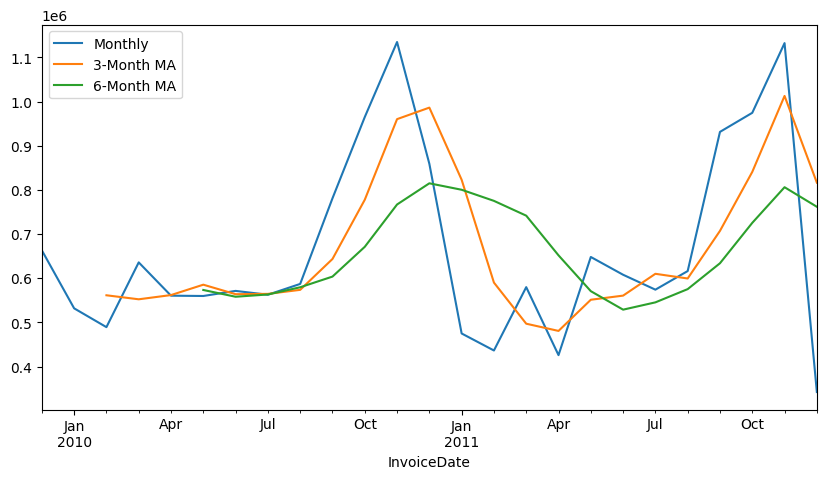

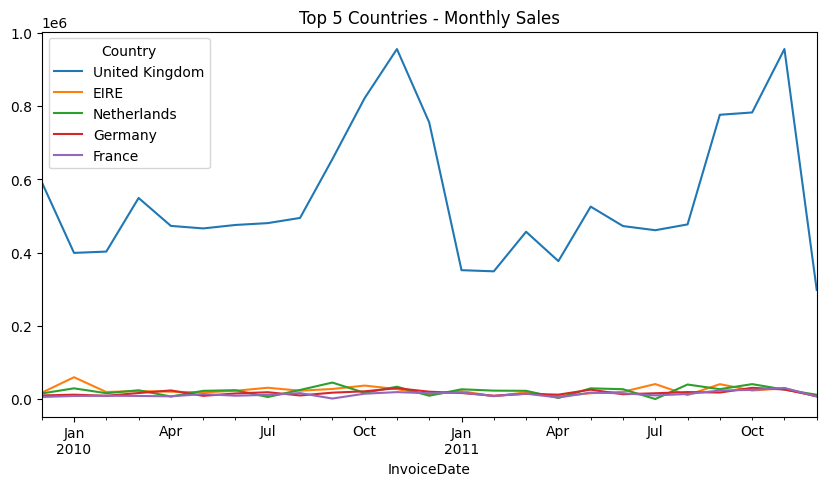

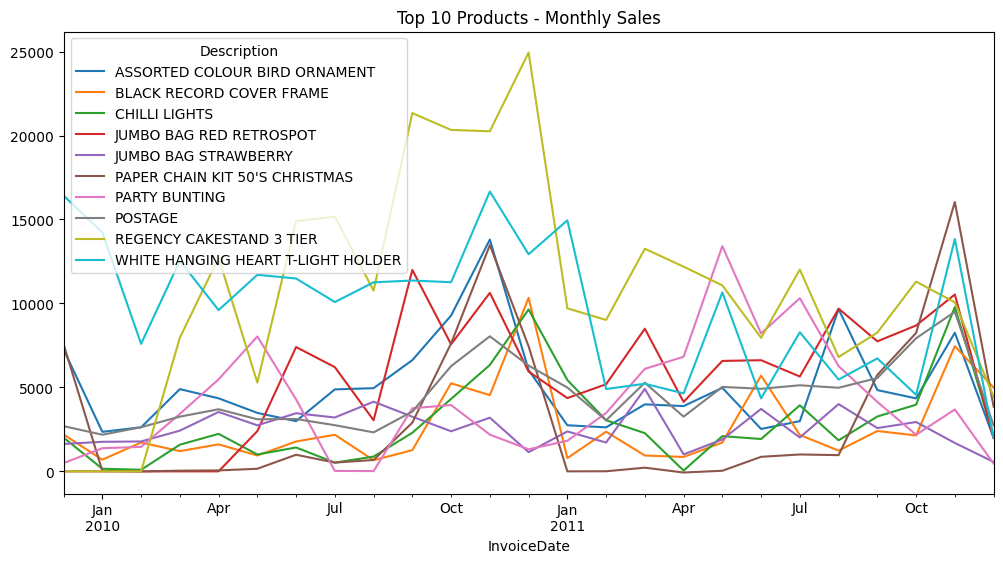

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset
df = pd.read_csv("online_retail_II.csv", parse_dates=["InvoiceDate"])

# 2. Clean the data
df = df.dropna(subset=["Customer ID"])
df["Sales"] = df["Quantity"] * df["Price"]

# 3. Aggregate to monthly sales
monthly = df.set_index("InvoiceDate").resample("MS")["Sales"].sum()

# Plot monthly sales trend
monthly.plot(title="Total Monthly Sales", figsize=(10,5))
plt.ylabel("Revenue (£)")
plt.show()

# 4. Moving Averages
ma3 = monthly.rolling(3).mean()
ma6 = monthly.rolling(6).mean()

ax = monthly.plot(label="Monthly", figsize=(10,5))
ma3.plot(ax=ax, label="3-Month MA")
ma6.plot(ax=ax, label="6-Month MA")
plt.legend()
plt.show()


# 6. Breakdown by Country
country_sales = (df.set_index("InvoiceDate")
                   .groupby("Country")
                   .resample("MS")["Sales"]
                   .sum()
                   .unstack(0)
                   .fillna(0))

# plot top 5 countries
top_countries = country_sales.sum().sort_values(ascending=False).head(5).index
country_sales[top_countries].plot(figsize=(10,5), title="Top 5 Countries - Monthly Sales")
plt.show()

# 7. Breakdown by Product (top categories by description)
# group by product description (optional: top 10 products)
top_products = (df.groupby("Description")["Sales"]
                  .sum()
                  .sort_values(ascending=False)
                  .head(10)
                  .index)

product_sales = (df[df["Description"].isin(top_products)]
                   .set_index("InvoiceDate")
                   .groupby("Description")
                   .resample("MS")["Sales"]
                   .sum()
                   .unstack(0)
                   .fillna(0))

product_sales.plot(figsize=(12,6), title="Top 10 Products - Monthly Sales")
plt.show()



